# Jena Climate Dataset 2010 to 2020

## Data Exploration

The dataet contains climate data from 01.Jan.2010 to 01.Jan.2021 collected by Max Planck Institute for Biogeochemistry in Jena. 21 features were recorded every 10min resulting in 894K entries:
+ Index: Date Time (year-month-day hour:minutes:seconds)
+ p [mbar] - ait pressur
+ T [°C] - air temperatur
+ Tpot [K] - potential temperatur
+ Tdew [°C] - dew point temperatur
+ rh [%] - relative humidity
+ VPmax [mbar] - saturation water vapor pressure
+ VPact [mbar] - actual water vapor pressure
+ VPdef [mbar] - water vapor pressure deficit
+ sh [g/kg] - specific humidity
+ H2OC [mmol/mol] - water vapor concentration
+ rho [g/m^3] - air density
+ wv [m/s] - wind velocity
+ max wv[m/s] - maximum wind velocity
+ wd [degree] - wind direction
+ rain [mm] - precipitation
+ raining [s] - duration of precipitation
+ SWDR [W/m^2] - short wave downward radiation
+ PAR [µmol/(m^2 s)] - photosynthetically active radiation 
+ maxPAR [µmol/(m^2 s)] - maximum photosynthetically active radiation
+ Tlog [°C] - internal logger temperatur
+ CO2 [ppm] - CO2 concentration in ambient air

The dataset was collected from https://www.bgc-jena.mpg.de/wetter/weather_data.html <br
For further information see https://www.bgc-jena.mpg.de/wetter/Weatherstation.pdf

In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Data Analysation and Feature Exploration

In [2]:
full_dataset = pd.read_csv("D:\Datasets\jena_climate\jena_weather_2004_2020.csv")

In [3]:
full_dataset.dtypes

Date Time                object
p (mbar)                float64
T (degC)                float64
Tpot (K)                float64
Tdew (degC)             float64
rh (%)                  float64
VPmax (mbar)            float64
VPact (mbar)            float64
VPdef (mbar)            float64
sh (g/kg)               float64
H2OC (mmol/mol)         float64
rho (g/m**3)            float64
wv (m/s)                float64
max. wv (m/s)           float64
wd (deg)                float64
rain (mm)               float64
raining (s)             float64
SWDR (W/m²)             float64
PAR (µmol/m²/s)         float64
max. PAR (µmol/m²/s)    float64
Tlog (degC)             float64
CO2 (ppm)               float64
dtype: object

### Converting Date Time [string] to pd.datetime

In [4]:
filepath = "D:\Datasets\jena_climate\jena_weather_2010_2020.csv"

if os.path.exists(filepath):
    dataset_2010_2020 = pd.read_csv(filepath)
else:
    full_dataset['Date Time'] = pd.to_datetime(full_dataset['Date Time'])
    dataset_2010_2020 = full_dataset.loc[full_dataset['Date Time'].dt.year >=2010]
    dataset_2010_2020.reset_index(inplace=True)
    dataset_2010_2020.drop('index', axis=1, inplace=True)
    dataset_2010_2020.to_csv(filepath, index=False)

In [5]:
columns = dataset_2010_2020.columns
dataset_2010_2020.head()

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),...,wv (m/s),max. wv (m/s),wd (deg),rain (mm),raining (s),SWDR (W/m²),PAR (µmol/m²/s),max. PAR (µmol/m²/s),Tlog (degC),CO2 (ppm)
0,2010-01-01 00:00:00,967.36,-2.84,272.89,-3.43,95.7,4.95,4.74,0.21,3.05,...,2.96,4.61,25.08,0.1,350.0,0.0,0.0,0.0,8.66,405.0
1,2010-01-01 00:10:00,967.56,-2.84,272.89,-3.41,95.8,4.95,4.75,0.21,3.06,...,1.61,2.76,15.41,0.0,0.0,0.0,0.0,0.0,8.59,404.6
2,2010-01-01 00:20:00,967.45,-2.85,272.88,-3.43,95.7,4.95,4.74,0.21,3.05,...,2.00,3.10,17.04,0.0,0.0,0.0,0.0,0.0,8.53,404.1
3,2010-01-01 00:30:00,967.45,-2.88,272.85,-3.46,95.8,4.94,4.73,0.21,3.05,...,2.25,3.79,25.35,0.0,0.0,0.0,0.0,0.0,8.52,404.3
4,2010-01-01 00:40:00,967.34,-2.90,272.84,-3.47,95.8,4.93,4.72,0.21,3.04,...,2.64,3.77,23.64,0.0,270.0,0.0,0.0,0.0,8.54,404.0


### Checking data for missing values

In [6]:
columns = dataset_2010_2020.columns
for i, c in enumerate(columns):
    print(i, c)

0 Date Time
1 p (mbar)
2 T (degC)
3 Tpot (K)
4 Tdew (degC)
5 rh (%)
6 VPmax (mbar)
7 VPact (mbar)
8 VPdef (mbar)
9 sh (g/kg)
10 H2OC (mmol/mol)
11 rho (g/m**3)
12 wv (m/s)
13 max. wv (m/s)
14 wd (deg)
15 rain (mm)
16 raining (s)
17 SWDR (W/m²)
18 PAR (µmol/m²/s)
19 max. PAR (µmol/m²/s)
20 Tlog (degC)
21 CO2 (ppm)


In [7]:
type(dataset_2010_2020)

pandas.core.frame.DataFrame

In [8]:
dataset_2010_2020[columns[:10]].describe()

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg)
count,578327.000000,578327.000000,578327.000000,578327.000000,578327.000000,578327.000000,578327.000000,578327.000000,578327.000000
mean,989.478602,9.920274,283.942639,5.134273,74.766090,13.975560,9.619074,4.356410,6.075636
std,8.522694,8.330285,8.431875,6.580003,16.922032,7.953936,4.165860,5.199421,2.645863
min,913.600000,-21.040000,251.480000,-23.390000,12.950000,1.130000,0.920000,0.000000,0.570000
25%,984.450000,3.750000,277.770000,0.430000,63.500000,7.990000,6.300000,0.990000,3.970000
50%,989.800000,9.710000,283.780000,5.340000,77.900000,12.060000,8.940000,2.370000,5.640000
75%,995.050000,15.880000,289.940000,10.180000,88.500000,18.070000,12.440000,5.700000,7.860000
max,1020.070000,37.280000,311.340000,23.110000,100.000000,63.770000,28.320000,47.810000,18.130000


In [9]:
dataset_2010_2020[columns[10:]].describe()

,H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg),rain (mm),raining (s),SWDR (W/m²),PAR (µmol/m²/s),max. PAR (µmol/m²/s),Tlog (degC),CO2 (ppm)
count,578327.000000,578327.000000,578327.000000,578327.000000,578327.000000,578327.000000,578327.000000,578327.000000,578327.000000,578327.000000,578327.000000,578327.000000
mean,9.725218,1214.310708,1.797424,3.200329,174.955115,0.009141,40.590533,125.784347,246.568061,297.146481,21.501016,390.011661
std,4.218693,39.706263,57.344399,58.868685,85.808723,0.102837,141.291338,209.700355,407.258295,529.385534,8.130183,510.700409
min,0.910000,1059.450000,-9999.000000,-9999.000000,0.000000,0.000000,-9999.000000,0.000000,0.000000,-9999.000000,-4.580000,-9999.000000
25%,6.370000,1185.640000,0.980000,1.760000,124.400000,0.000000,0.000000,0.000000,0.000000,0.000000,15.180000,401.200000
50%,9.040000,1212.590000,1.740000,2.960000,197.700000,0.000000,0.000000,2.410000,8.300000,11.390000,20.780000,412.400000
75%,12.570000,1241.590000,2.850000,4.760000,233.300000,0.000000,0.000000,170.020000,338.610000,400.190000,27.100000,425.400000
max,28.820000,1393.540000,28.490000,23.500000,360.000000,13.700000,600.000000,1219.320000,2401.540000,2500.000000,50.470000,586.000000


In [10]:
x = dataset_2010_2020[(dataset_2010_2020[columns[12]]==-9999.) | (dataset_2010_2020[columns[16]]==-9999.) | (dataset_2010_2020[columns[19]]==-9999.)|(dataset_2010_2020[columns[-1]]==-9999.)]
x

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),...,wv (m/s),max. wv (m/s),wd (deg),rain (mm),raining (s),SWDR (W/m²),PAR (µmol/m²/s),max. PAR (µmol/m²/s),Tlog (degC),CO2 (ppm)
11631,2010-03-22 18:30:00,993.74,10.71,284.38,6.28,74.00,12.89,9.54,3.35,5.99,...,1.40,2.12,247.20,0.0,160.0,0.40,2.90,4.83,22.93,-9999.0
11632,2010-03-22 18:40:00,993.65,10.63,284.31,6.06,73.30,12.82,9.40,3.42,5.90,...,0.00,0.00,0.00,0.0,600.0,0.00,1.35,1.93,22.84,-9999.0
11633,2010-03-22 18:50:00,993.66,10.68,284.36,5.85,72.00,12.87,9.26,3.60,5.82,...,0.00,0.00,0.00,0.0,600.0,0.00,0.00,0.00,22.80,-9999.0
11634,2010-03-22 19:00:00,993.71,10.77,284.44,5.72,70.90,12.94,9.18,3.77,5.76,...,0.00,0.00,0.00,0.0,600.0,0.00,0.00,0.00,22.65,-9999.0
11635,2010-03-22 19:10:00,993.82,10.81,284.47,5.74,70.80,12.98,9.19,3.79,5.77,...,0.00,0.00,0.00,0.0,600.0,0.00,0.00,0.00,22.35,-9999.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
557400,2020-08-08 16:20:00,991.86,34.54,308.41,11.49,24.74,54.88,13.58,41.30,8.56,...,2.83,4.23,69.15,0.0,0.0,495.33,982.23,1008.20,49.09,-9999.0
557401,2020-08-08 16:30:00,991.80,34.11,307.98,11.29,25.01,53.58,13.40,40.18,8.45,...,1.80,2.99,66.76,0.0,0.0,457.99,908.87,946.46,49.06,-9999.0
557402,2020-08-08 16:40:00,991.79,33.90,307.77,11.31,25.33,52.96,13.42,39.55,8.46,...,2.41,4.34,73.67,0.0,0.0,422.45,834.07,869.76,48.91,-9999.0
557403,2020-08-08 16:50:00,991.73,33.82,307.70,11.52,25.81,52.73,13.61,39.12,8.58,...,2.52,4.27,79.40,0.0,0.0,391.95,768.36,798.63,48.70,-9999.0


In [11]:
missing_values = len(x)/len(dataset_2010_2020)
print(f"In total there are {len(x)} values missing/wrong. This is {missing_values*100:.2f} %")

In total there are 1584 values missing/wrong. This is 0.27 %


In [12]:
type(dataset_2010_2020)
dataset_2010_2020.dtypes

Date Time                object
p (mbar)                float64
T (degC)                float64
Tpot (K)                float64
Tdew (degC)             float64
rh (%)                  float64
VPmax (mbar)            float64
VPact (mbar)            float64
VPdef (mbar)            float64
sh (g/kg)               float64
H2OC (mmol/mol)         float64
rho (g/m**3)            float64
wv (m/s)                float64
max. wv (m/s)           float64
wd (deg)                float64
rain (mm)               float64
raining (s)             float64
SWDR (W/m²)             float64
PAR (µmol/m²/s)         float64
max. PAR (µmol/m²/s)    float64
Tlog (degC)             float64
CO2 (ppm)               float64
dtype: object

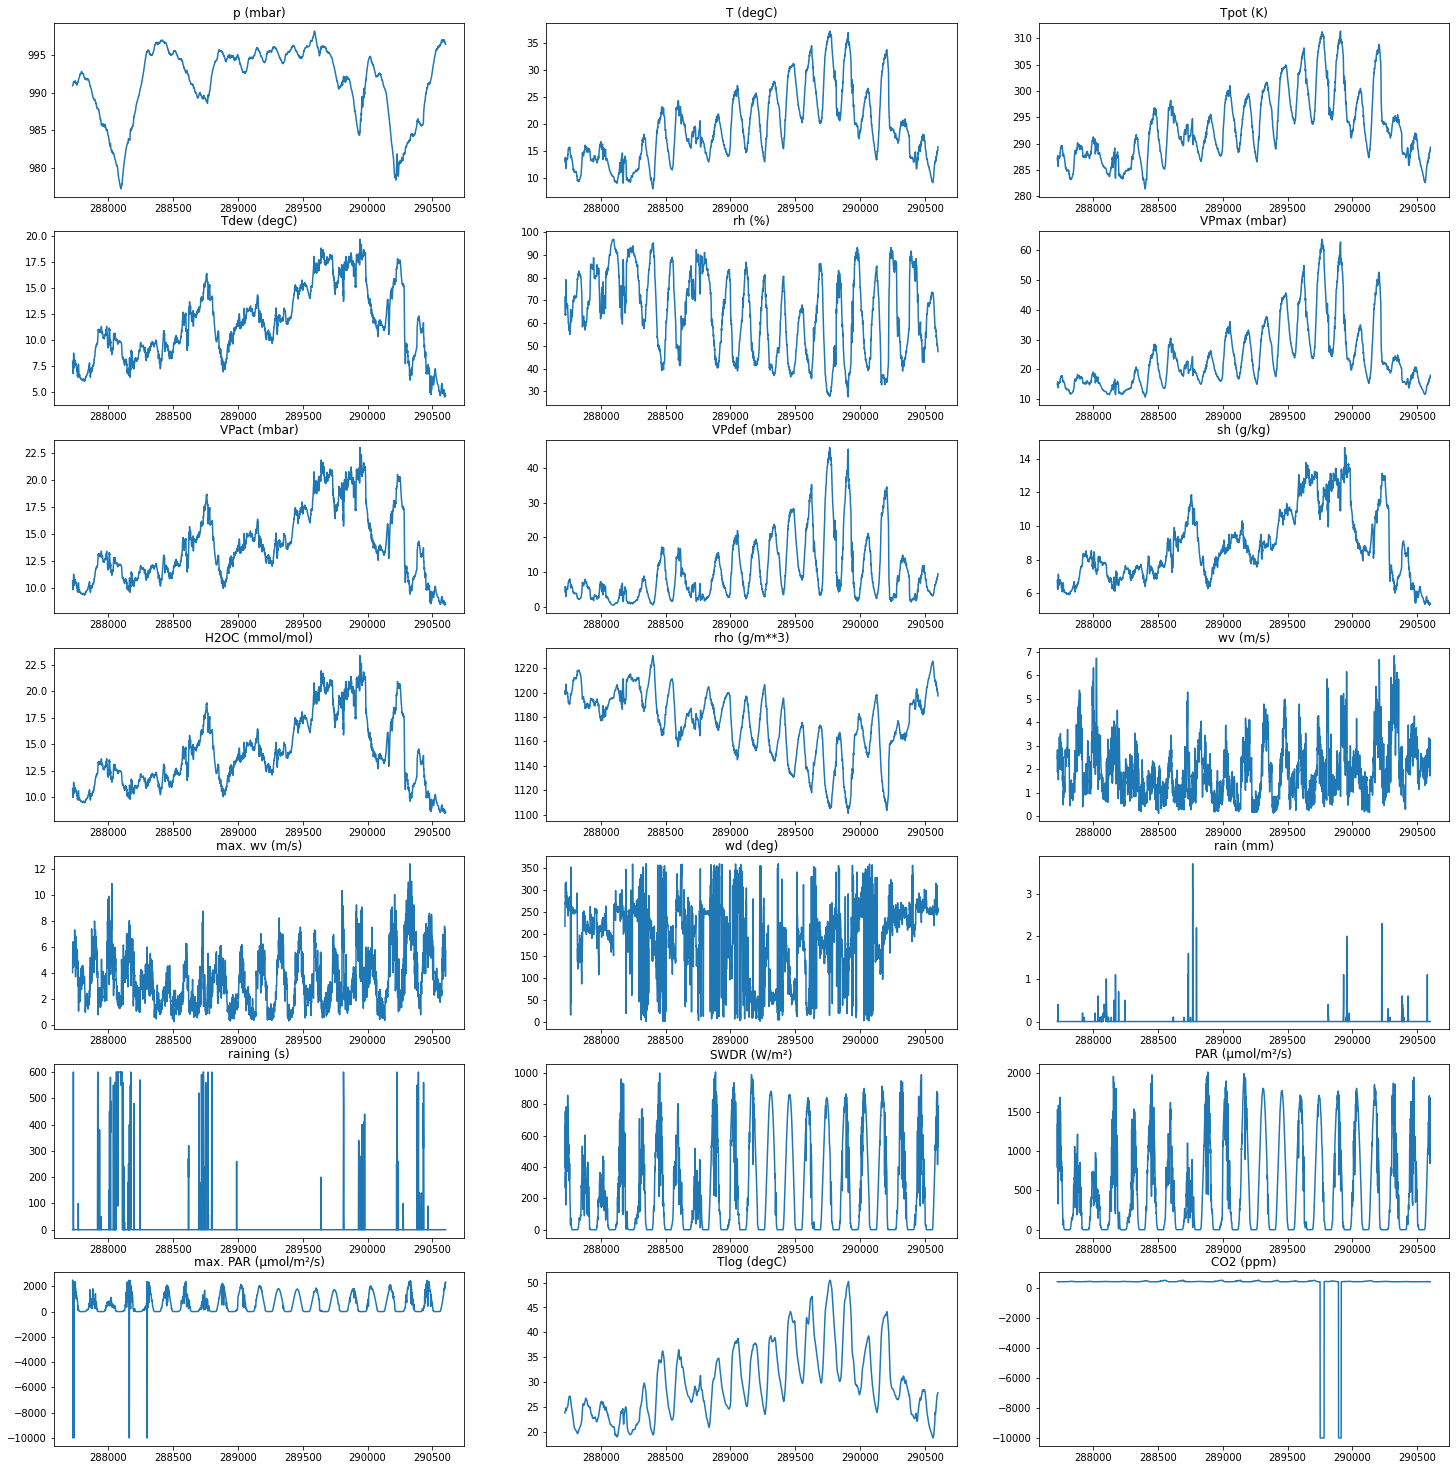

In [13]:
# plotting 2880 datapoints (= 20 days)from the middle of the set
plt.figure(figsize=(25,30))

for i in range(1,len(columns)):
    plt.subplot(8,3,i)
    dataset_2010_2020[columns[i]].iloc[int(len(dataset_2010_2020)/2)-1440:int(len(dataset_2010_2020)/2)+1440].plot()
    plt.title(columns[i])


### Replacing missing values

* with the mean of all vaild values (CO2ppm)
* with the nearest valid value (wv (m/s), max wv (m/s), raining(s) and PAR (µmol/m²/s))


In [14]:
index_dict = {}
for col in columns:
    index = dataset_2010_2020[dataset_2010_2020[col]==-9999.0].index
    if len(index)>0:
        index_dict[col]=index
        print(f"Feature {col} has {len(index)} missing values")
        print(index_dict[col])
        print()

Feature wv (m/s) has 19 missing values
Int64Index([291021, 291022, 291023, 291024, 291025, 291026, 291027, 291028,
            291029, 291030, 291031, 291032, 291033, 291034, 291035, 291036,
            291037, 291038, 532876],
           dtype='int64')

Feature max. wv (m/s) has 20 missing values
Int64Index([291020, 291021, 291022, 291023, 291024, 291025, 291026, 291027,
            291028, 291029, 291030, 291031, 291032, 291033, 291034, 291035,
            291036, 291037, 291038, 291039],
           dtype='int64')

Feature raining (s) has 1 missing values
Int64Index([160921], dtype='int64')

Feature max. PAR (µmol/m²/s) has 173 missing values
Int64Index([ 18937,  21526,  21530,  21531,  21533,  22104,  22106,  22107,
             22966,  23266,
            ...
            553057, 553059, 553060, 553345, 553346, 554060, 555213, 555651,
            555652, 555654],
           dtype='int64', length=173)

Feature CO2 (ppm) has 1392 missing values
Int64Index([ 11631,  11632,  11633,  1163

In [15]:
# CO2
co2_mean = dataset_2010_2020[columns[-1]][dataset_2010_2020[columns[-1]]!= -9999.].mean()
co2_mean

415.07774983317023

In [16]:
dataset_2010_2020.loc[(dataset_2010_2020[columns[-1]] == -9999.), 'CO2 (ppm)'] = co2_mean


In [17]:
# raining
dataset_2010_2020.loc[index_dict['raining (s)'], 'raining (s)'] = dataset_2010_2020['raining (s)'].iloc[index_dict['raining (s)']-1]

In [18]:
# max. PAR (µmol/m²/s)
valid_values=[]
if 'max. PAR (µmol/m²/s)' in index_dict.keys():
    for i in index_dict['max. PAR (µmol/m²/s)'].values:
        if dataset_2010_2020[columns[19]].iloc[i-1] > -9999.:
            valid_values.append((i, dataset_2010_2020[columns[19]].iloc[i-1]))
        elif dataset_2010_2020[columns[19]].iloc[i+1] > -9999.:
            valid_values.append((i, dataset_2010_2020[columns[19]].iloc[i+1]))
        elif dataset_2010_2020[columns[19]].iloc[i-2] > -9999.:
            valid_values.append((i, dataset_2010_2020[columns[19]].iloc[i-2]))
        elif dataset_2010_2020[columns[19]].iloc[i+2] > -9999.:
            valid_values.append((i, dataset_2010_2020[columns[19]].iloc[i+2]))
        elif dataset_2010_2020[columns[19]].iloc[i-3] > -9999.:
            valid_values.append((i, dataset_2010_2020[columns[19]].iloc[i-3]))
        elif dataset_2010_2020[columns[19]].iloc[i+3] > -9999.:
            valid_values.append((i, dataset_2010_2020[columns[19]].iloc[i+3]))
        elif dataset_2010_2020[columns[19]].iloc[i-4] > -9999.:
            valid_values.append((i, dataset_2010_2020[columns[19]].iloc[i-4]))
        elif dataset_2010_2020[columns[19]].iloc[i+4] > -9999.:
            valid_values.append((i, dataset_2010_2020[columns[19]].iloc[i+4]))
        



In [19]:
if 'max. PAR (µmol/m²/s)' in index_dict.keys():
    index_list = index_dict['max. PAR (µmol/m²/s)']
    for i in range(len(valid_values)):
        dataset_2010_2020.loc[index_list[i], 'max. PAR (µmol/m²/s)'] = valid_values[i][0]

In [20]:
index_dict = {}
for col in columns:
    index = dataset_2010_2020[dataset_2010_2020[col]==-9999.0].index
    if len(index)>0:
        index_dict[col]=index
        print(f"Feature {col} has {len(index)} missing values")
        print(index_dict[col])
        print()

Feature wv (m/s) has 19 missing values
Int64Index([291021, 291022, 291023, 291024, 291025, 291026, 291027, 291028,
            291029, 291030, 291031, 291032, 291033, 291034, 291035, 291036,
            291037, 291038, 532876],
           dtype='int64')

Feature max. wv (m/s) has 20 missing values
Int64Index([291020, 291021, 291022, 291023, 291024, 291025, 291026, 291027,
            291028, 291029, 291030, 291031, 291032, 291033, 291034, 291035,
            291036, 291037, 291038, 291039],
           dtype='int64')



Text(0.5, 1.0, 'wv (m/s) values offset 144 of invalids')

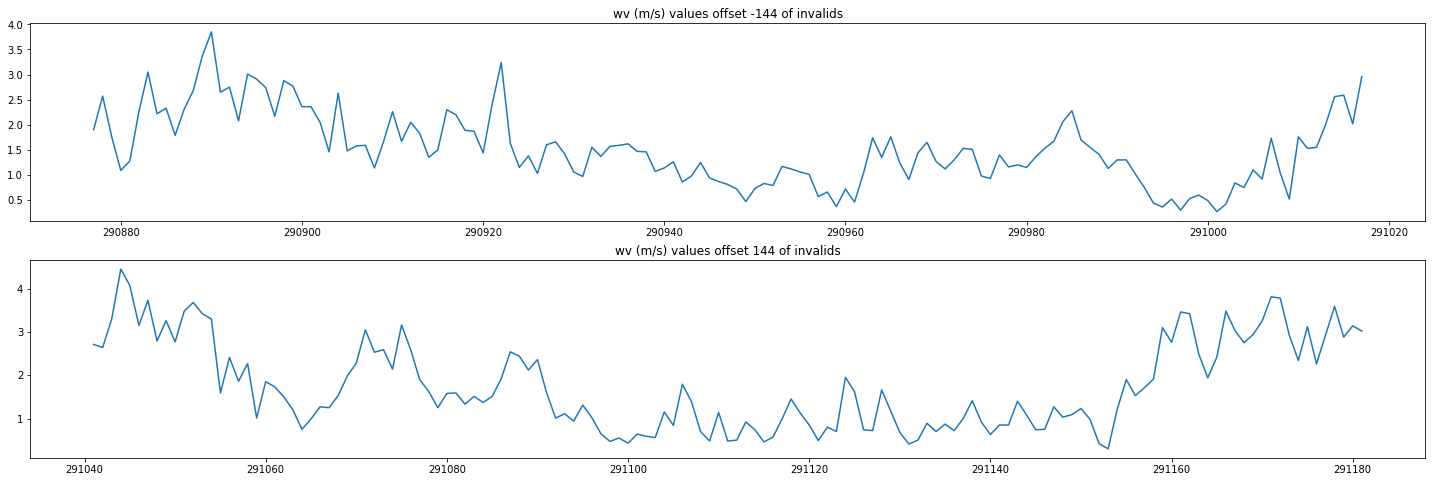

In [21]:
offset = 6*24
B = list(index_dict['wv (m/s)'])

plt.figure(figsize=(25,8))

plt.subplot(2,1,1)
dataset_2010_2020['wv (m/s)'].iloc[B[0]-offset:B[0]-3].plot()
plt.title(f"wv (m/s) values offset {-offset} of invalids")

plt.subplot(2,1,2)
dataset_2010_2020['wv (m/s)'].iloc[B[-2]+3:B[-2]+offset].plot()
plt.title(f"wv (m/s) values offset {+offset} of invalids")

In [22]:
# wv (m/s))

# replacing the stretch of missing values with values from 20 timesteps(10min) before
valid_values=[]
if 'wv (m/s)' in index_dict.keys():
    for i in index_dict['wv (m/s)'][0:-1]:
        valid_values.append(dataset_2010_2020[columns[12]].iloc[i-20])

# replacing the last missing value with the value before
valid_values.append(dataset_2010_2020[columns[12]].iloc[index_dict['wv (m/s)'][-1]-1])

In [23]:
if 'wv (m/s)' in index_dict.keys():
    index_list = index_dict['wv (m/s)']
    for i in range(len(valid_values)):
        dataset_2010_2020.loc[index_list[i], 'wv (m/s)'] = valid_values[i]

In [24]:
# max. wv (m/s))

# replacing the stretch of missing values with values from 20 timesteps(10min) before
valid_values=[]
if 'max. wv (m/s)' in index_dict.keys():
    for i in index_dict['max. wv (m/s)']:
        valid_values.append(dataset_2010_2020[columns[13]].iloc[i-20])

In [25]:
if 'max. wv (m/s)' in index_dict.keys():
    index_list = index_dict['max. wv (m/s)']
    for i in range(len(valid_values)):
        dataset_2010_2020.loc[index_list[i], 'max. wv (m/s)'] = valid_values[i]

In [26]:
index_dict = {}
for col in columns:
    index = dataset_2010_2020[dataset_2010_2020[col]==-9999.0].index
    if len(index)>0:
        index_dict[col]=index
        print(f"Feature {col} has {len(index)} missing values")
        print(index_dict[col])
        print()

In [27]:
dataset_2010_2020[columns[:11]].describe()

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol)
count,578327.000000,578327.000000,578327.000000,578327.000000,578327.000000,578327.000000,578327.000000,578327.000000,578327.000000,578327.000000
mean,989.478602,9.920274,283.942639,5.134273,74.766090,13.975560,9.619074,4.356410,6.075636,9.725218
std,8.522694,8.330285,8.431875,6.580003,16.922032,7.953936,4.165860,5.199421,2.645863,4.218693
min,913.600000,-21.040000,251.480000,-23.390000,12.950000,1.130000,0.920000,0.000000,0.570000,0.910000
25%,984.450000,3.750000,277.770000,0.430000,63.500000,7.990000,6.300000,0.990000,3.970000,6.370000
50%,989.800000,9.710000,283.780000,5.340000,77.900000,12.060000,8.940000,2.370000,5.640000,9.040000
75%,995.050000,15.880000,289.940000,10.180000,88.500000,18.070000,12.440000,5.700000,7.860000,12.570000
max,1020.070000,37.280000,311.340000,23.110000,100.000000,63.770000,28.320000,47.810000,18.130000,28.820000


In [28]:
dataset_2010_2020[columns[11:]].describe()

,rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg),rain (mm),raining (s),SWDR (W/m²),PAR (µmol/m²/s),max. PAR (µmol/m²/s),Tlog (degC),CO2 (ppm)
count,578327.000000,578327.000000,578327.000000,578327.000000,578327.000000,578326.000000,578327.000000,578327.000000,578327.000000,578327.000000,578327.000000
mean,1214.310708,2.125976,3.546218,174.955115,0.009141,40.607892,125.784347,246.568061,395.744125,21.501016,415.077750
std,39.706263,1.550456,2.371354,85.808723,0.102837,140.673350,209.700355,407.258295,6248.903224,8.130183,20.063984
min,1059.450000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-4.580000,301.500000
25%,1185.640000,0.980000,1.760000,124.400000,0.000000,0.000000,0.000000,0.000000,0.000000,15.180000,401.300000
50%,1212.590000,1.740000,2.960000,197.700000,0.000000,0.000000,2.410000,8.300000,11.390000,20.780000,412.500000
75%,1241.590000,2.850000,4.760000,233.300000,0.000000,0.000000,170.020000,338.610000,401.160000,27.100000,425.400000
max,1393.540000,28.490000,23.500000,360.000000,13.700000,600.000000,1219.320000,2401.540000,555654.000000,50.470000,586.000000


In [29]:
index_dict = {}
for col in columns:
    index = dataset_2010_2020[dataset_2010_2020[col]==-9999.0].index
    if len(index)>0:
        index_dict[col]=index
        print(f"Feature {col} has {len(index)} missing values")
        print(index_dict[col])
        print()

Rerunning the index_dict loop shows, as did the dataframe statistics above, that no invalid values are left

In [30]:
if os.path.exists("D:\Datasets\jena_climate\cleaned_jena_weather_2010_2020.csv"):
    dataset_2010_2020 = pd.read_csv("D:\Datasets\jena_climate\cleaned_jena_weather_2010_2020.csv")
else:
    dataset_2010_2020.to_csv("D:\Datasets\jena_climate\cleaned_jena_weather_2010_2020.csv",index=False)


In [31]:
dataset_2010_2020.head()

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),...,wv (m/s),max. wv (m/s),wd (deg),rain (mm),raining (s),SWDR (W/m²),PAR (µmol/m²/s),max. PAR (µmol/m²/s),Tlog (degC),CO2 (ppm)
0,2010-01-01 00:00:00,967.36,-2.84,272.89,-3.43,95.7,4.95,4.74,0.21,3.05,...,2.96,4.61,25.08,0.1,350.0,0.0,0.0,0.0,8.66,405.0
1,2010-01-01 00:10:00,967.56,-2.84,272.89,-3.41,95.8,4.95,4.75,0.21,3.06,...,1.61,2.76,15.41,0.0,0.0,0.0,0.0,0.0,8.59,404.6
2,2010-01-01 00:20:00,967.45,-2.85,272.88,-3.43,95.7,4.95,4.74,0.21,3.05,...,2.00,3.10,17.04,0.0,0.0,0.0,0.0,0.0,8.53,404.1
3,2010-01-01 00:30:00,967.45,-2.88,272.85,-3.46,95.8,4.94,4.73,0.21,3.05,...,2.25,3.79,25.35,0.0,0.0,0.0,0.0,0.0,8.52,404.3
4,2010-01-01 00:40:00,967.34,-2.90,272.84,-3.47,95.8,4.93,4.72,0.21,3.04,...,2.64,3.77,23.64,0.0,270.0,0.0,0.0,0.0,8.54,404.0


Checking for completeness

In [32]:
a =[x for x in range(2010, 2021)]
for y in a:
    df1 = dataset_2010_2020[pd.to_datetime(dataset_2010_2020['Date Time']).dt.year ==y]
    df2 = pd.DataFrame(pd.date_range(start=f"{y}/01/01 00:00:00", end=f"{y}/12/31 23:50:00", freq="10Min"), columns=['datetime'])
    df2['numericaltime'] = df2.apply(lambda  x: (x['datetime'].value - df2['datetime'].iloc[0].value)/(6*10**10), axis=1 )
    print("Year {}: Length: MPI-Dataset {}; Lenght: Generated Dataset {}; Differenz in hours: {}".format(y, len(df1), len(df2), (len(df1) - len(df2))/6))

Year 2010: Length: MPI-Dataset 52704; Lenght: Generated Dataset 52560; Differenz in hours: 24.0
Year 2011: Length: MPI-Dataset 52560; Lenght: Generated Dataset 52560; Differenz in hours: 0.0
Year 2012: Length: MPI-Dataset 52704; Lenght: Generated Dataset 52704; Differenz in hours: 0.0
Year 2013: Length: MPI-Dataset 52559; Lenght: Generated Dataset 52560; Differenz in hours: -0.16666666666666666
Year 2014: Length: MPI-Dataset 52647; Lenght: Generated Dataset 52560; Differenz in hours: 14.5
Year 2015: Length: MPI-Dataset 52560; Lenght: Generated Dataset 52560; Differenz in hours: 0.0
Year 2016: Length: MPI-Dataset 52259; Lenght: Generated Dataset 52704; Differenz in hours: -74.16666666666667
Year 2017: Length: MPI-Dataset 52560; Lenght: Generated Dataset 52560; Differenz in hours: 0.0
Year 2018: Length: MPI-Dataset 52517; Lenght: Generated Dataset 52560; Differenz in hours: -7.166666666666667
Year 2019: Length: MPI-Dataset 52560; Lenght: Generated Dataset 52560; Differenz in hours: 0.0
Y

### Summary: 
+ Unfortunately the data shows some sampling erros.
  + in 2010 and 2014: more datapoints were collected than should 
  + 2013, 2016, 2018 and 2020 show some gaps   

## Feature Engineering

To utelize the winddirection feature, the values get transforemd from degree to **sin** and **cos** values



In [33]:
dataset_2010_2020['sin(wd)'] = dataset_2010_2020.apply(lambda x : np.sin(np.deg2rad(x['wd (deg)'])),axis=1)

In [34]:
dataset_2010_2020['cos(wd)'] = dataset_2010_2020.apply(lambda x : np.cos(np.deg2rad(x['wd (deg)'])),axis=1)

Now, 'wd (deg)' and 'Tpot(K) get dropped.

In [35]:
dataset_2010_2020.drop('wd (deg)', axis=1, inplace=True)
dataset_2010_2020.drop('Tpot (K)', axis=1, inplace=True)
dataset_2010_2020.head()

,Date Time,p (mbar),T (degC),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),...,max. wv (m/s),rain (mm),raining (s),SWDR (W/m²),PAR (µmol/m²/s),max. PAR (µmol/m²/s),Tlog (degC),CO2 (ppm),sin(wd),cos(wd)
0,2010-01-01 00:00:00,967.36,-2.84,-3.43,95.7,4.95,4.74,0.21,3.05,4.90,...,4.61,0.1,350.0,0.0,0.0,0.0,8.66,405.0,0.423883,0.905717
1,2010-01-01 00:10:00,967.56,-2.84,-3.41,95.8,4.95,4.75,0.21,3.06,4.91,...,2.76,0.0,0.0,0.0,0.0,0.0,8.59,404.6,0.265724,0.964049
2,2010-01-01 00:20:00,967.45,-2.85,-3.43,95.7,4.95,4.74,0.21,3.05,4.90,...,3.10,0.0,0.0,0.0,0.0,0.0,8.53,404.1,0.293039,0.956100
3,2010-01-01 00:30:00,967.45,-2.88,-3.46,95.8,4.94,4.73,0.21,3.05,4.89,...,3.79,0.0,0.0,0.0,0.0,0.0,8.52,404.3,0.428147,0.903709
4,2010-01-01 00:40:00,967.34,-2.90,-3.47,95.8,4.93,4.72,0.21,3.04,4.88,...,3.77,0.0,270.0,0.0,0.0,0.0,8.54,404.0,0.400989,0.916083


In [36]:
columns = dataset_2010_2020.columns
columns = columns.delete(0)

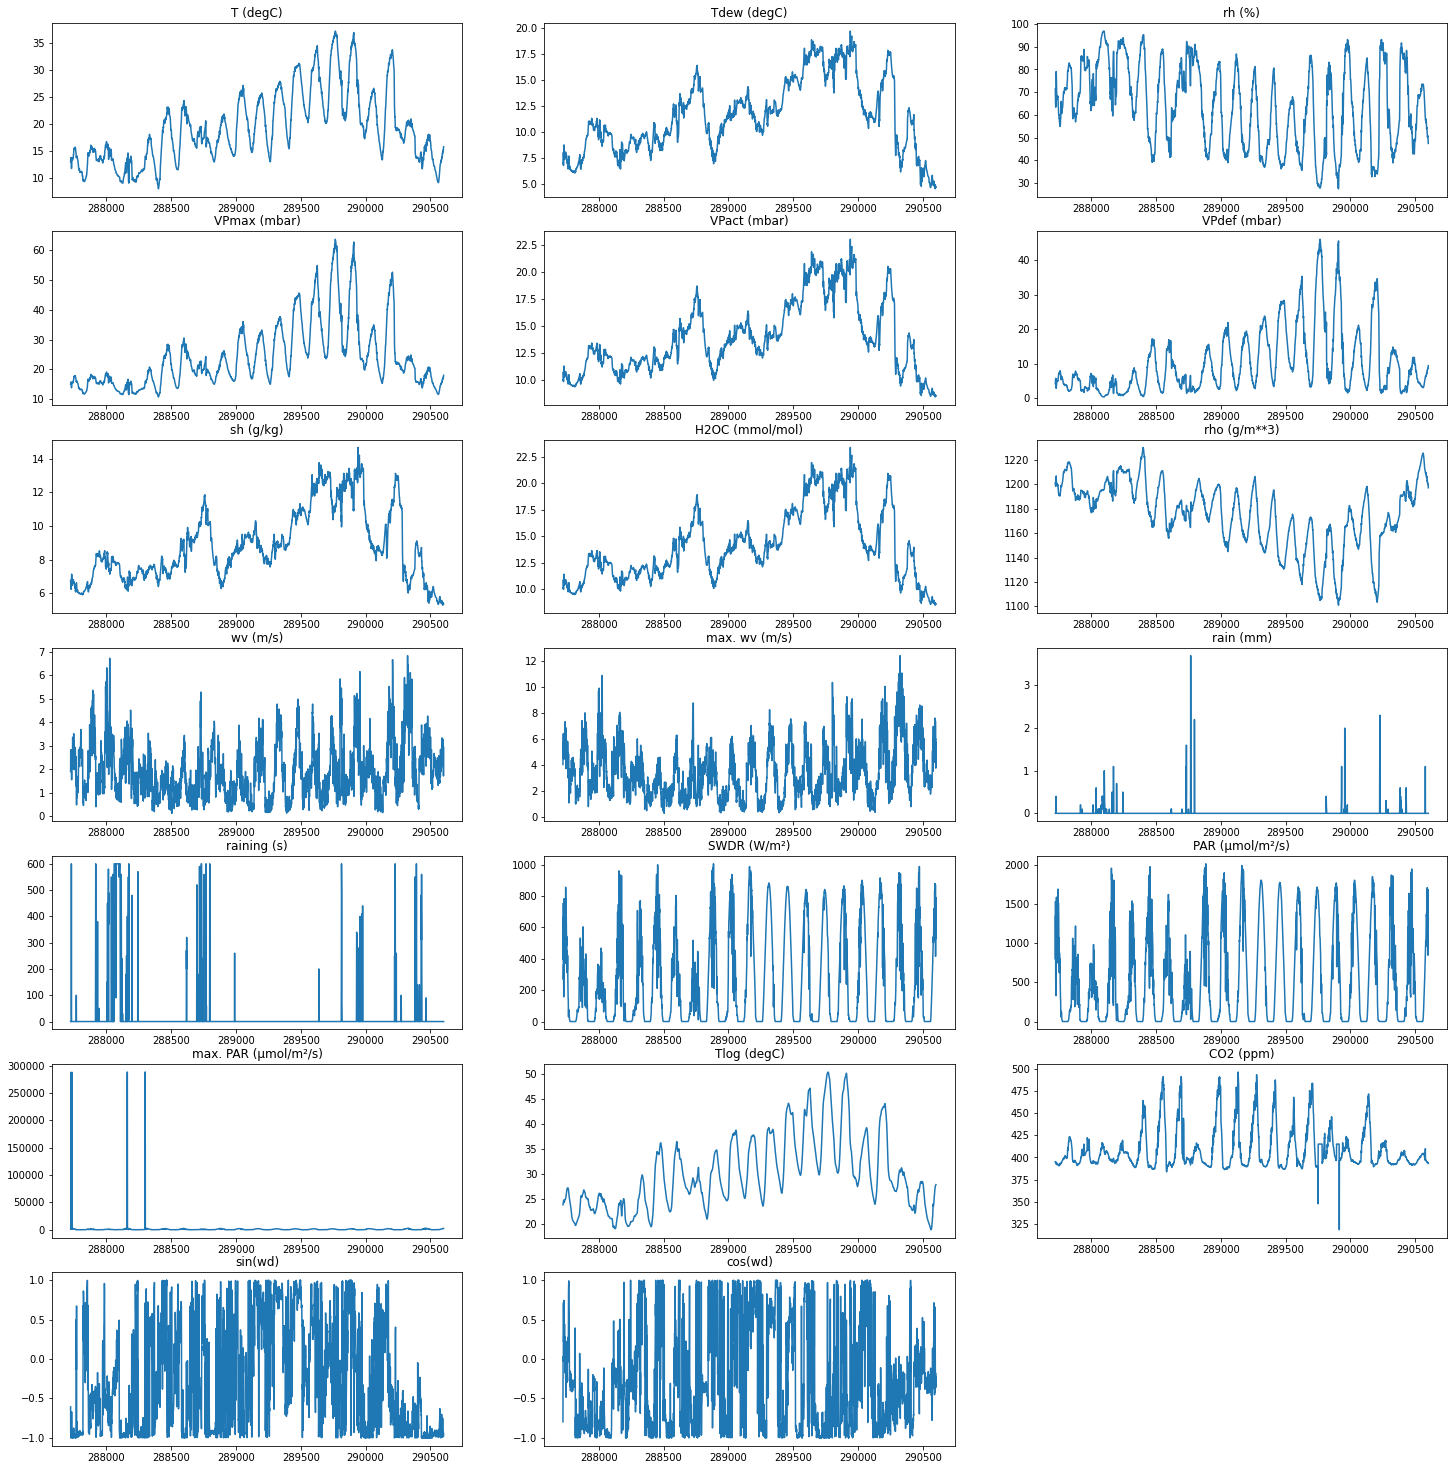

In [37]:
plt.figure(figsize=(25,30))

for i in range(1,len(columns)):
    plt.subplot(8,3,i)
    dataset_2010_2020[columns[i]].iloc[int(len(dataset_2010_2020)/2)-1440:int(len(dataset_2010_2020)/2)+1440].plot()
    plt.title(columns[i])


In [38]:
corr = dataset_2010_2020.corr()

[Text(0.5, 1.0, 'Correlation Matrix')]

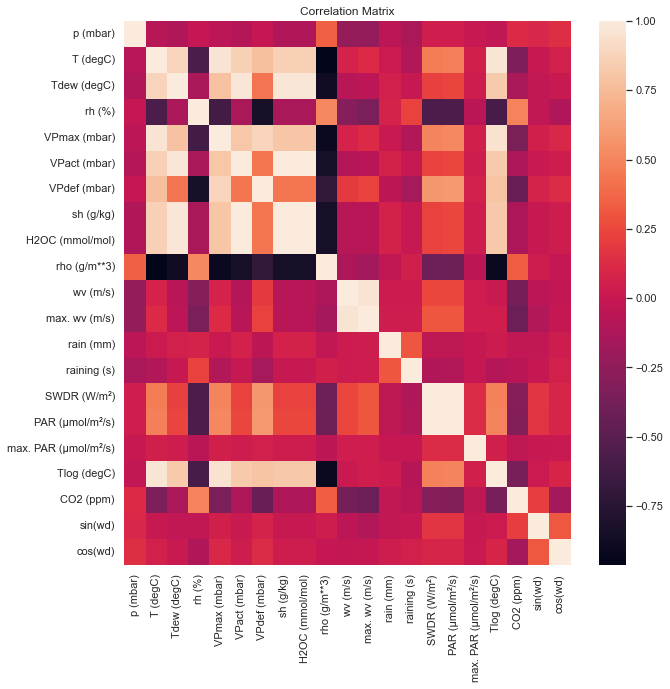

In [39]:
sns.set(rc={"figure.figsize":(10,10)})

sns.heatmap(corr, cbar=True).set(title="Correlation Matrix")

<AxesSubplot:title={'center':'Correlation between Temperatue and the other features'}>

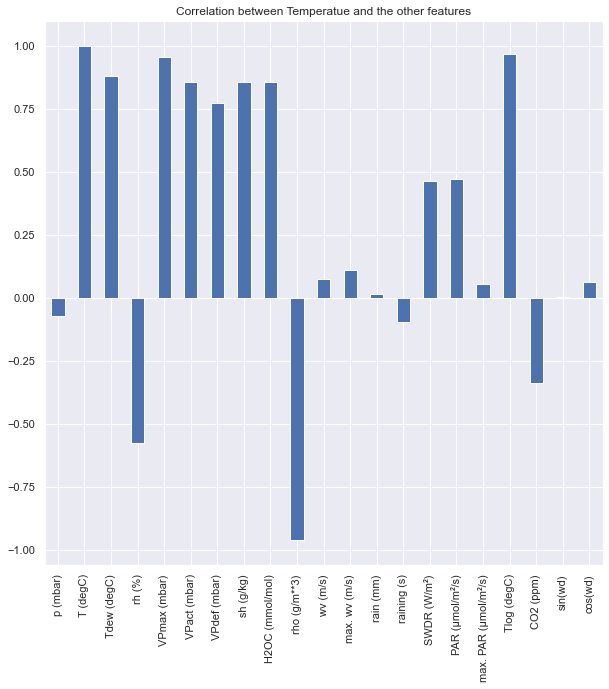

In [40]:
corr["T (degC)"].plot(kind='bar', title="Correlation between Temperatue and the other features")

Since 'max. PAR (µmol/m²/s)' has extrem outliers and correlates hardly with temperatur, this feature gets dropped aswell

In [41]:
dataset_2010_2020.drop('max. PAR (µmol/m²/s)', inplace=True, axis=1)


### Checking or NaNs

In [51]:
a =dataset_2010_2020.isna()
a.sum()

Date Time          0
p (mbar)           0
T (degC)           0
Tdew (degC)        0
rh (%)             0
VPmax (mbar)       0
VPact (mbar)       0
VPdef (mbar)       0
sh (g/kg)          0
H2OC (mmol/mol)    0
rho (g/m**3)       0
wv (m/s)           0
max. wv (m/s)      0
rain (mm)          0
raining (s)        1
SWDR (W/m²)        0
PAR (µmol/m²/s)    0
Tlog (degC)        0
CO2 (ppm)          0
sin(wd)            0
cos(wd)            0
dtype: int64

In [53]:
dataset_2010_2020.loc[a['raining (s)']==True]


,Date Time,p (mbar),T (degC),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),...,wv (m/s),max. wv (m/s),rain (mm),raining (s),SWDR (W/m²),PAR (µmol/m²/s),Tlog (degC),CO2 (ppm),sin(wd),cos(wd)
160921,2013-01-21 12:10:00,973.64,-5.92,-7.6,87.8,3.92,3.44,0.48,2.2,3.54,...,1.88,2.38,0.0,NaN,87.32,191.89,8.34,424.5,0.583683,0.811982


In [50]:
dataset_2010_2020.iloc[160921-3: 160921+3]

,Date Time,p (mbar),T (degC),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),...,wv (m/s),max. wv (m/s),rain (mm),raining (s),SWDR (W/m²),PAR (µmol/m²/s),Tlog (degC),CO2 (ppm),sin(wd),cos(wd)
160918,2013-01-21 11:40:00,973.83,-6.11,-7.63,88.9,3.87,3.44,0.43,2.20,3.53,...,1.75,2.40,0.0,600.0,89.54,196.52,9.09,423.9,0.669520,0.742794
160919,2013-01-21 11:50:00,973.74,-6.07,-7.59,88.9,3.88,3.45,0.43,2.20,3.54,...,1.58,2.08,0.0,600.0,88.93,194.98,8.80,423.8,0.503774,0.863836
160920,2013-01-21 12:00:00,973.65,-5.96,-7.61,88.0,3.91,3.44,0.47,2.20,3.53,...,1.84,2.74,0.0,600.0,92.56,202.70,8.55,423.9,0.638634,0.769511
160921,2013-01-21 12:10:00,973.64,-5.92,-7.60,87.8,3.92,3.44,0.48,2.20,3.54,...,1.88,2.38,0.0,NaN,87.32,191.89,8.34,424.5,0.583683,0.811982
160922,2013-01-21 12:20:00,973.62,-5.94,-7.63,87.8,3.91,3.44,0.48,2.20,3.53,...,2.30,2.88,0.0,600.0,90.14,199.61,8.17,423.0,0.424516,0.905421
160923,2013-01-21 12:30:00,973.66,-5.98,-7.74,87.3,3.90,3.41,0.50,2.18,3.50,...,2.18,3.04,0.0,600.0,91.95,203.86,8.04,422.1,0.372340,0.928096


In [54]:
# replacing the NaN with the 600.0
dataset_2010_2020['raining (s)'].iloc[160921] = 600.0

C:\Users\neema\AppData\Local\Temp\ipykernel_4772\4231603071.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_2010_2020['raining (s)'].iloc[160921] = 600.0


In [55]:
dataset_2010_2020.iloc[160921]

Date Time          2013-01-21 12:10:00
p (mbar)                        973.64
T (degC)                         -5.92
Tdew (degC)                       -7.6
rh (%)                            87.8
VPmax (mbar)                      3.92
VPact (mbar)                      3.44
VPdef (mbar)                      0.48
sh (g/kg)                          2.2
H2OC (mmol/mol)                   3.54
rho (g/m**3)                   1267.49
wv (m/s)                          1.88
max. wv (m/s)                     2.38
rain (mm)                          0.0
raining (s)                      600.0
SWDR (W/m²)                      87.32
PAR (µmol/m²/s)                 191.89
Tlog (degC)                       8.34
CO2 (ppm)                        424.5
sin(wd)                       0.583683
cos(wd)                       0.811982
Name: 160921, dtype: object

In [56]:
dataset_2010_2020.to_feather("D:\\Datasets\\jena_climate\\prepared_data_2021_2020.ftr")